In [1]:
#I need to quantify diversity now

In [1]:
import glob
import os
import pandas as pd
import json
import numpy as np
import gzip

In [ ]:

def get_cys_lines(path):
    with gzip.open(path,'rt') as f:
        for line in f:
            in line.startswith("ATOM") and line[17:20] == "CYS":
                resi = int(line[22:26])
                print(resi)
#     decoy = df[df['review_id'] == name]['decoy'].values[0]
#     hbnet_path = hbnet_mapping[decoy]
#     print(hbnet_path)
#     res_i_n_map = {}
#     constraints = []
#     with open(hbnet_path,'r') as pdb:
#         for line in pdb.readlines():
#             if line.startswith("ATOM"):
#                 resname = line[17:20].strip()
#                 resi = int(line[22:26])
#                 res_i_n_map[resi] = resname
#             if line[1:9] == "AtomPair":
#                 constraints.append(line[1:])
    
#     bonds = []
#     for constraint in constraints:
#         #1st is acceptor
#         #2nd is donor

#         #if atom of acceptor is O, that's a bb and I might just ignore.
#         acceptor_atom = constraint.split()[1]
#         acceptor_resi = int(constraint.split()[2])
#         donor_atom = constraint.split()[3]
#         donor_resi = int(constraint.split()[4])
#         if acceptor_atom != "O":
#             bonds.append(((donor_resi,res_i_n_map[donor_resi]),(acceptor_resi,res_i_n_map[acceptor_resi])))
        
        
        
#     #         HBNet_resis = set()

#     #         #convert constraints
#     #         adjusted_constraints = []
#     #         len_chain_A = 66
#     #         for constraint in constraints:
#     #                 constraint_parts = constraint.split()
#     #                 #oops! hardcoded
#     #                 if int(constraint_parts[2]) <= len_chain_A:
#     #                         constraint_parts[2] = f"{constraint_parts[2]}A"
#     #                 else:
#     #                         constraint_parts[2] = f"{int(constraint_parts[2]) + len_chain_A}B"

#     #                 if int(constraint_parts[4]) <= len_chain_A:
#     #                         constraint_parts[4] = f"{constraint_parts[4]}A"
#     #                 else:
#     #                         constraint_parts[4] = f"{int(constraint_parts[4]) + len_chain_A}B"
#     #                 adjusted_constraints.append(" ".join(constraint_parts) + "\n")

#     #         for constraint in adjusted_constraints:
#     #                 HBNet_resis.add(constraint.split()[2])
#     #                 HBNet_resis.add(constraint.split()[4])

#     #         return HBNet_resis
#     return bonds

In [4]:
all_ss_pdbs = glob.glob("output/*.pdb.gz")
all_ss_pdbs

[]

In [6]:

review_ids = sorted([os.path.basename(x).split(".pdb.gz")[0] for x in all_passing_pdbs])


In [7]:

nets = {}
for ris in review_ids:
    nets[ris] = get_hbnet_lines(ris)
    


/net/scratch/rdkibler/201224_rotor_hbnet/2/RC4_20_mini_nm_00077_1.6_31_0001_0034/RC4_20_mini_nm_00077_1.6_31_0001_0034_hb.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/2/RC4_20_mini_nm_00146_1.6_31_0001_0042/RC4_20_mini_nm_00146_1.6_31_0001_0042_hb.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/2/RC4_20_mini_nm_00083_1.6_31_0001_0051/RC4_20_mini_nm_00083_1.6_31_0001_0051_hb.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/3/RC4_20_mini_nm_00137_1.6_31_0001_0057/RC4_20_mini_nm_00137_1.6_31_0001_0057_hb_0010.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/0/RC4_20_mini_nm_00152_1.6_31_0001_0045/RC4_20_mini_nm_00152_1.6_31_0001_0045_hb_0003.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/2/RC4_20_mini_nm_00074_1.6_31_0001_0012/RC4_20_mini_nm_00074_1.6_31_0001_0012_hb_0002.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/0/RC4_20_mini_nm_00184_1.6_31_0001_0044/RC4_20_mini_nm_00184_1.6_31_0001_0044_hb.pdb
/net/scratch/rdkibler/201224_rotor_hbnet/0/RC4_20_mini_nm_00099_1.6_31_0001_0058/RC4_20_mini_nm_00099_1

In [8]:
hbnet_resises = {}
for des_id, bonds in nets.items():
    resis = set()
    for bond in bonds:
        resis.add(bond[0])
        resis.add(bond[1])
    hbnet_resises[des_id] = resis

In [9]:
hbnet_resises

{'RC_4_20_nmp1_redesign_01': {(24, 'SER'),
  (25, 'GLN'),
  (29, 'GLU'),
  (129, 'GLN'),
  (148, 'SER')},
 'RC_4_20_nmp1_redesign_02': {(21, 'HIS'), (121, 'SER'), (125, 'THR')},
 'RC_4_20_nmp1_redesign_03': {(21, 'SER'), (125, 'SER'), (151, 'SER')},
 'RC_4_20_nmp1_redesign_04': {(21, 'ASN'),
  (22, 'GLU'),
  (125, 'SER'),
  (151, 'SER'),
  (152, 'THR'),
  (164, 'SER')},
 'RC_4_20_nmp1_redesign_05': {(21, 'HIS'), (121, 'SER'), (125, 'THR')},
 'RC_4_20_nmp1_redesign_06': {(21, 'GLN'), (125, 'THR'), (160, 'ASN')},
 'RC_4_20_nmp1_redesign_07': {(21, 'GLN'), (125, 'THR'), (160, 'ASN')},
 'RC_4_20_nmp1_redesign_08': {(21, 'HIS'),
  (121, 'SER'),
  (125, 'THR'),
  (160, 'SER')},
 'RC_4_20_nmp1_redesign_09': {(21, 'GLN'), (125, 'SER'), (160, 'ASN')},
 'RC_4_20_nmp1_redesign_10': {(21, 'GLN'), (125, 'THR'), (160, 'ASN')},
 'RC_4_20_nmp1_redesign_11': {(17, 'SER'),
  (20, 'GLN'),
  (114, 'GLN'),
  (118, 'SER')},
 'RC_4_20_nmp1_redesign_12': {(21, 'GLN'), (125, 'SER'), (160, 'ASN')},
 'RC_4_20_nm

In [10]:
#I guess let's try to construct a matrix?

In [11]:

def num_shared_resis(net_resis_1,net_resis_2):
    #gonna treat SER and THR the exact same for this
    #may also collapse GLN and ASN, but let's see
    
    #cast all THR to SER
    net_resis_1 = set([(x[0],x[1].replace('THR','SER')) for x in net_resis_1])
    net_resis_2 = set([(x[0],x[1].replace('THR','SER')) for x in net_resis_2])
    print(net_resis_1)

In [12]:
#give me nets
def across_interface(resi_1, resi_2):
    chainbreak = 66
    return (resi_1 <= chainbreak) ^ (resi_2 <= chainbreak)

def pct_shared_interface_bonds(net1,net2):
#     print("net1")
#     print(net1)
#     print("net2")
#     print(net2)
    
    #cast all THR to SER
    #we're also sorting the bonds b/c I don't want to depend on donors/acceptors lining up as designed, especially for serines
    temp = []
    for bond in net1:
        donor = list(bond[0])
        acceptor = list(bond[1])
        
        donor[1] = donor[1].replace('THR','SER')
        acceptor[1] = acceptor[1].replace('THR','SER')
        
        bond = tuple(sorted([tuple(donor),tuple(acceptor)]))
        temp.append(bond)
    net1 = temp
    
    temp = []
    for bond in net2:
        donor = list(bond[0])
        acceptor = list(bond[1])
        
        donor[1] = donor[1].replace('THR','SER')
        acceptor[1] = acceptor[1].replace('THR','SER')
        
        bond = tuple(sorted([tuple(donor),tuple(acceptor)]))
        temp.append(bond)
    net2 = temp
    
    
    
    
    
#     print("convert")
#     print("net1")
#     print(net1)
#     print("net2")
#     print(net2)
#     print("interface_bonds_1")
    interface_bonds_1 = set([(donor,acceptor) for donor,acceptor in net1 if across_interface(donor[0],acceptor[0])])
#     print(interface_bonds_1)
    num_interface_bonds_1 = len(interface_bonds_1)
#     print(num_interface_bonds_1)
#     print("interface_bonds_2")
    interface_bonds_2 = set([(donor,acceptor) for donor,acceptor in net2 if across_interface(donor[0],acceptor[0])])
#     print(interface_bonds_2)
    num_interface_bonds_2 = len(interface_bonds_2)
#     print(num_interface_bonds_2)
    
    unique_interface_bonds = interface_bonds_1.union(interface_bonds_2)
    shared_interface_bonds = interface_bonds_1.intersection(interface_bonds_2)
    
    percent_shared = len(shared_interface_bonds) / len(unique_interface_bonds)
    return percent_shared

In [13]:
#same = all identical interface bonds = 0
#different = no identical interface bonds = 1
#in between = num identical interface bonds / num unique interface bonds

In [17]:
net1 = list(nets.values())[1]
net2 = list(nets.values())[7]
pct_shared_interface_bonds(net1,net2)

1.0

In [18]:
net_pair_similarity = []


net_pair_similarity_matrix = np.zeros([len(nets),len(nets)])
names = sorted(list(nets.keys()))

for i,k1 in enumerate(names):
    for j,k2 in enumerate(names):
        net_pair_similarity_matrix[i,j] = pct_shared_interface_bonds(nets[k1],nets[k2])

In [19]:
net_pair_similarity_matrix

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.25],
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 1.  ]])

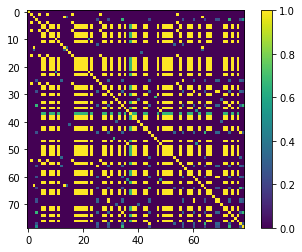

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(net_pair_similarity_matrix)
plt.colorbar()
plt.show()

In [20]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(min_samples=1).fit_predict(net_pair_similarity_matrix)
clusters

array([ 0,  1,  2,  3,  1,  4,  4,  1,  4,  4,  5,  4,  6,  2,  7,  8,  1,
        4,  4,  4,  4,  4,  9,  4, 10, 11,  1,  4,  4, 12,  4, 13, 14,  4,
       15,  4, 16, 17,  4,  4, 18, 19,  4,  4, 20, 21, 13,  4, 16,  4,  4,
        4,  4, 22,  1,  4, 11, 23,  4,  4, 12, 24,  4,  2, 25,  4,  4, 26,
       12, 12, 27,  4,  4, 15,  4, 28,  4, 20, 29])

In [21]:
len(clusters)

79

In [22]:
from collections import defaultdict

In [23]:
#sorting keys into clusters
cluster_groups = defaultdict(lambda:[])
for cluster_number,name in zip(clusters,names):
    print(name, cluster_number)
    cluster_groups[cluster_number].append(name)

RC_4_20_nmp1_redesign_01 0
RC_4_20_nmp1_redesign_02 1
RC_4_20_nmp1_redesign_03 2
RC_4_20_nmp1_redesign_04 3
RC_4_20_nmp1_redesign_05 1
RC_4_20_nmp1_redesign_06 4
RC_4_20_nmp1_redesign_07 4
RC_4_20_nmp1_redesign_08 1
RC_4_20_nmp1_redesign_09 4
RC_4_20_nmp1_redesign_10 4
RC_4_20_nmp1_redesign_11 5
RC_4_20_nmp1_redesign_12 4
RC_4_20_nmp1_redesign_13 6
RC_4_20_nmp1_redesign_14 2
RC_4_20_nmp1_redesign_15 7
RC_4_20_nmp1_redesign_16 8
RC_4_20_nmp1_redesign_17 1
RC_4_20_nmp1_redesign_18 4
RC_4_20_nmp1_redesign_19 4
RC_4_20_nmp1_redesign_20 4
RC_4_20_nmp1_redesign_21 4
RC_4_20_nmp1_redesign_22 4
RC_4_20_nmp1_redesign_23 9
RC_4_20_nmp1_redesign_24 4
RC_4_20_nmp1_redesign_25 10
RC_4_20_nmp1_redesign_26 11
RC_4_20_nmp1_redesign_27 1
RC_4_20_nmp1_redesign_28 4
RC_4_20_nmp1_redesign_29 4
RC_4_20_nmp1_redesign_30 12
RC_4_20_nmp1_redesign_31 4
RC_4_20_nmp1_redesign_32 13
RC_4_20_nmp1_redesign_33 14
RC_4_20_nmp1_redesign_34 4
RC_4_20_nmp1_redesign_35 15
RC_4_20_nmp1_redesign_36 4
RC_4_20_nmp1_redesign_

In [14]:
pct_shared_interface_bonds(nets['RC_4_20_nmp1_redesign_37'],nets['RC_4_20_nmp1_redesign_49'])

1.0

In [31]:
nets['RC_4_20_nmp1_redesign_58']

[((29, 'ARG'), (25, 'SER')),
 ((25, 'SER'), (148, 'THR')),
 ((29, 'ARG'), (149, 'GLU'))]

In [15]:
nets['RC_4_20_nmp1_redesign_37']

[((129, 'SER'), (28, 'SER')),
 ((144, 'HIS'), (28, 'SER')),
 ((128, 'SER'), (144, 'HIS')),
 ((130, 'ARG'), (129, 'SER'))]

In [16]:
nets['RC_4_20_nmp1_redesign_49']

[((28, 'SER'), (129, 'SER')),
 ((144, 'HIS'), (28, 'SER')),
 ((128, 'SER'), (144, 'HIS'))]

In [24]:
cluster_groups

defaultdict(<function __main__.<lambda>()>,
            {0: ['RC_4_20_nmp1_redesign_01'],
             1: ['RC_4_20_nmp1_redesign_02',
              'RC_4_20_nmp1_redesign_05',
              'RC_4_20_nmp1_redesign_08',
              'RC_4_20_nmp1_redesign_17',
              'RC_4_20_nmp1_redesign_27',
              'RC_4_20_nmp1_redesign_55'],
             2: ['RC_4_20_nmp1_redesign_03',
              'RC_4_20_nmp1_redesign_14',
              'RC_4_20_nmp1_redesign_64'],
             3: ['RC_4_20_nmp1_redesign_04'],
             4: ['RC_4_20_nmp1_redesign_06',
              'RC_4_20_nmp1_redesign_07',
              'RC_4_20_nmp1_redesign_09',
              'RC_4_20_nmp1_redesign_10',
              'RC_4_20_nmp1_redesign_12',
              'RC_4_20_nmp1_redesign_18',
              'RC_4_20_nmp1_redesign_19',
              'RC_4_20_nmp1_redesign_20',
              'RC_4_20_nmp1_redesign_21',
              'RC_4_20_nmp1_redesign_22',
              'RC_4_20_nmp1_redesign_24',
             

['RC_4_20_nmp1_redesign_01', 'RC_4_20_nmp1_redesign_04', 'RC_4_20_nmp1_redesign_11', 'RC_4_20_nmp1_redesign_13', 'RC_4_20_nmp1_redesign_15', 'RC_4_20_nmp1_redesign_16', 'RC_4_20_nmp1_redesign_23', 'RC_4_20_nmp1_redesign_25', 'RC_4_20_nmp1_redesign_33', 'RC_4_20_nmp1_redesign_38', 'RC_4_20_nmp1_redesign_41', 'RC_4_20_nmp1_redesign_42', 'RC_4_20_nmp1_redesign_46', 'RC_4_20_nmp1_redesign_54', 'RC_4_20_nmp1_redesign_58', 'RC_4_20_nmp1_redesign_62', 'RC_4_20_nmp1_redesign_65', 'RC_4_20_nmp1_redesign_68', 'RC_4_20_nmp1_redesign_71', 'RC_4_20_nmp1_redesign_76', 'RC_4_20_nmp1_redesign_79', 'RC_4_20_nmp1_redesign_26', 'RC_4_20_nmp1_redesign_57', 'RC_4_20_nmp1_redesign_32', 'RC_4_20_nmp1_redesign_47', 'RC_4_20_nmp1_redesign_35', 'RC_4_20_nmp1_redesign_74', 'RC_4_20_nmp1_redesign_37', 'RC_4_20_nmp1_redesign_49', 'RC_4_20_nmp1_redesign_45', 'RC_4_20_nmp1_redesign_78', 'RC_4_20_nmp1_redesign_03', 'RC_4_20_nmp1_redesign_14', 'RC_4_20_nmp1_redesign_64', 'RC_4_20_nmp1_redesign_30', 'RC_4_20_nmp1_redes

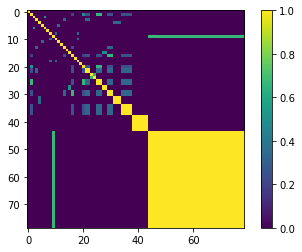

In [30]:
cluster_sorted_names = []
for clustered_names in sorted(cluster_groups.values(),key=lambda x: len(x)):
    cluster_sorted_names.extend(clustered_names)
print(cluster_sorted_names)

clustered_net_pair_similarity_matrix = np.zeros([len(nets),len(nets)])

for i,k1 in enumerate(cluster_sorted_names):
    for j,k2 in enumerate(cluster_sorted_names):
        clustered_net_pair_similarity_matrix[i,j] = pct_shared_interface_bonds(nets[k1],nets[k2])

        
plt.imshow(clustered_net_pair_similarity_matrix)
plt.colorbar()
plt.show()

In [ ]:
#ok, there's 29 clusters (of designs with identical cross-interface bonds)
#This means there's a theoretical maximum of 29 different designs

#how does this compare to the full set pre-design?

#I'll do that later